In [143]:
from shared import *
wearable_types_df = get_wearable_types_df()

## Wearables Equipped for Rarity Farming
Based on the first rarity farming snapshot of each season.

In [148]:
wearable_equipped_df = wearable_types_df.copy()
wearable_owners_equipped = []
i = 1
for block in RARITY_FARMING_BLOCKS:
    gotchis_wearables_df = get_gotchis_wearables_df(block)
    wearable_equipped_df = wearable_equipped_df.join(get_wearable_equipped_df(gotchis_wearables_df, wearable_types_df).rename(columns=lambda c: str(c) + '_rf' + str(i)), how='outer')
    wearable_owners_equipped += [[i, gotchis_wearables_df['owner.id'].str.lower().nunique()]]
    i += 1
wearable_owners_equipped_df = pd.DataFrame(wearable_owners_equipped, columns=['rfSeason', 'uniqueOwnersEquipped']).set_index('rfSeason')

### Equipped Rate by Season
Share of the total supply of wearables equipped to gotchis

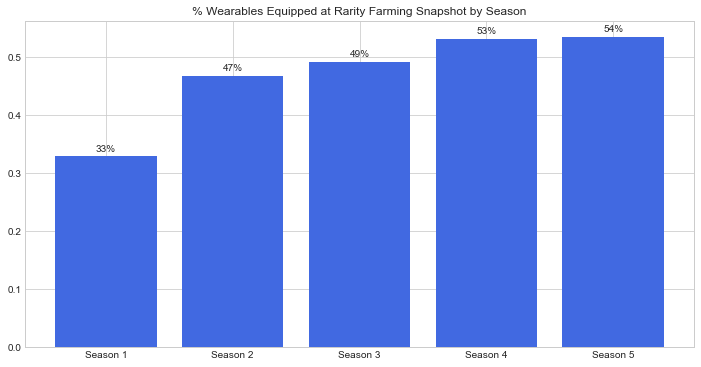

In [173]:
fig, ax = plt.subplots()
ax.set_title("% Wearables Equipped at Rarity Farming Snapshot by Season")
fig.set_size_inches(12,6)
rf_equipped_columns = []
bar_columns = []
bar_values = []
for i in range(0,len(RARITY_FARMING_BLOCKS)):
    equipped_column_name = 'equippedCount_rf' + str(i + 1)
    rf_equipped_columns += [equipped_column_name]
    rf_season_equipped_total = wearable_equipped_df[wearable_equipped_df[equipped_column_name] > 0][[equipped_column_name, 'maxQuantity']].sum()
    rf_season_equipped_total['equippedRate'] = (rf_season_equipped_total[equipped_column_name] / rf_season_equipped_total['maxQuantity'])
    bar_columns += ['Season {s}'.format(s=str(i + 1))]
    bar_values += [rf_season_equipped_total['equippedRate']]
annotate_bars(ax.bar(bar_columns, bar_values, color=DEFAULT_COLOR), ax, format="{0:.0%}")
pass

### Unique Equippers
The number of unique wallets that own at least one gotchi with a wearable equipped

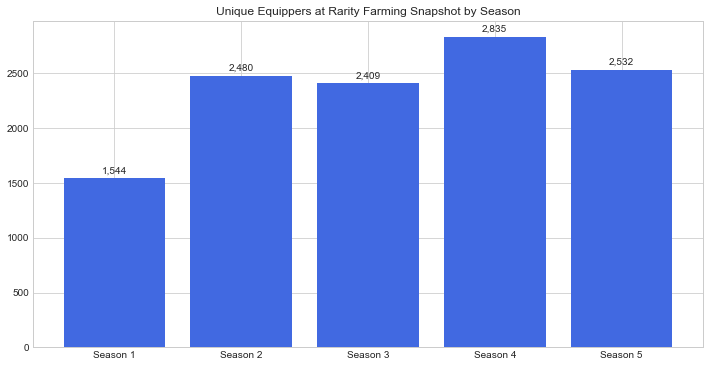

In [174]:
fig, ax = plt.subplots()
ax.set_title("Unique Equippers at Rarity Farming Snapshot by Season")
fig.set_size_inches(12,6)
annotate_bars(ax.bar(list(map(lambda s: 'Season {s}'.format(s=str(s)), wearable_owners_equipped_df.index.values)), wearable_owners_equipped_df['uniqueOwnersEquipped'], color=DEFAULT_COLOR), ax)
pass

In [175]:
column_name_mappings = {'name': 'Wearable', 'rarity': 'Rarity', 'slotNames': 'Slot(s)', 'maxQuantity': 'Total Supply', 'id': 'Total Count'}

def show_rf_equipped_by(agg_column_name):
    for i in range(0,len(RARITY_FARMING_BLOCKS)):
        rf_column_name = 'equippedCount_rf' + str(i + 1)
        mapped_column_name = 'Equipped RF Szn ' + str(i+1)
        def get_equipped_by_column(column_name):
            return wearable_equipped_df[wearable_equipped_df[rf_column_name] > 0].pivot_table(index=column_name,values=[rf_column_name, 'maxQuantity'],aggfunc=np.sum,margins=False).reset_index().rename(columns=column_name_mappings)
        column_name_mappings[rf_column_name] = mapped_column_name
        rf_season_equipped_df = get_equipped_by_column(agg_column_name)
        rf_season_equipped_df['Equipped Rate'] = (rf_season_equipped_df[mapped_column_name] / rf_season_equipped_df[column_name_mappings['maxQuantity']]).apply(lambda r: str(round(r * 100)) + '%')
        show_itable(rf_season_equipped_df, order=[1,'desc'], title='Season {s} &nbsp;&nbsp;<span style="font-size: 75%">(block #{b})<span>'.format(s=str(i+1), b=RARITY_FARMING_BLOCKS[i]))

### Equipped for Rarity Farming by Rarity

In [177]:
show_rf_equipped_by('rarity')